# Final Project 

Please fill out:
* Student name: Seyma Tas
* Student pace: full time
* Scheduled project review date/time: 
* Instructor name: Amber Yandow
* Blog post URL:


In [1]:
%autosave 10

Autosaving every 10 seconds


## Import libraries

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns 
sns.set(color_codes=True)
import matplotlib.pyplot as plt
%matplotlib inline

In [3]:
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

## Set options

In [4]:
pd.set_option('display.max_rows', None)
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
pd.set_option('display.max_colwidth', -1)


## Read datasets

In [5]:
movie_gross_df = pd.read_csv('zippedData/bom.movie_gross.csv.gz')
imdb_name_basics_df = pd.read_csv ('zippedData/imdb.name.basics.csv.gz')
imdb_title_akas_df = pd.read_csv('zippedData/imdb.title.akas.csv.gz')
## I am not loading movie_info_df because I found movies_df which has more movies.
# imdb_title_basics_df = pd.read_csv('zippedData/imdb.title.basics.csv.gz')
imdb_title_crew_df = pd.read_csv('zippedData/imdb.title.crew.csv.gz')
imdb_title_principals_df = pd.read_csv('zippedData/imdb.title.principals.csv.gz')
imdb_title_ratings_df = pd.read_csv('zippedData/imdb.title.ratings.csv.gz')
## I am not loading movie_info_df because I decided to not use the unique info (synopsis) from this table in my project
# movie_info_df = pd.read_csv('zippedData/rt.movie_info.tsv.gz', delimiter='\t') 
## I am not loading reviews_df because I decided to not use the unique info (review) from this table in my project
# reviews_df = pd.read_csv('zippedData/rt.reviews.tsv.gz', encoding= 'unicode_escape', delimiter = '\t')
tmdb_movies_df = pd.read_csv('zippedData/tmdb.movies.csv')
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')
money_df = pd.read_csv('zippedData/money.csv')
movies_df = pd.read_csv('zippedData/movies.csv')

In [6]:
movies_df.head()

,tconst,primaryTitle,startYear,genres
0,tt0000009,Miss Jerry,1894,Romance
1,tt0000147,The Corbett-Fitzsimmons Fight,1897,"Documentary,News,Sport"
2,tt0000335,Soldiers of the Cross,1900,"Biography,Drama"
3,tt0000502,Bohemios,1905,\N
4,tt0000574,The Story of the Kelly Gang,1906,"Biography,Crime,Drama"


In [7]:
movie_gross_df.head()

,title,studio,domestic_gross,foreign_gross,year
0,Toy Story 3,BV,415000000.0,652000000,2010
1,Alice in Wonderland (2010),BV,334200000.0,691300000,2010
2,Harry Potter and the Deathly Hallows Part 1,WB,296000000.0,664300000,2010
3,Inception,WB,292600000.0,535700000,2010
4,Shrek Forever After,P/DW,238700000.0,513900000,2010


In [8]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,"$425,000,000","$760,507,625","$2,776,345,279"
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,"$410,600,000","$241,063,875","$1,045,663,875"
2,3,"Jun 7, 2019",Dark Phoenix,"$350,000,000","$42,762,350","$149,762,350"
3,4,"May 1, 2015",Avengers: Age of Ultron,"$330,600,000","$459,005,868","$1,403,013,963"
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,"$317,000,000","$620,181,382","$1,316,721,747"


In [9]:
money_df.head()

,imdb_id,title,year,director,production_co,region_code,rank,budget_usd,us_gross
0,tt2488496,Star Wars: Episode VII - The Force Awakens,2015,J.J. Abrams,Lucasfilm,[US],519,$245MM,$937MM
1,tt4154796,Avengers: Endgame,2019,Anthony Russo,Marvel Studios,[US],111,$356MM,$858MM
2,tt0499549,Avatar,2009,James Cameron,Twentieth Century Fox,[US],533,$237MM,$761MM
3,tt1825683,Black Panther,2018,Ryan Coogler,Marvel Studios,[US],269,$200MM,$700MM
4,tt4154756,Avengers: Infinity War,2018,Anthony Russo,Marvel Studios,[US],376,$321MM,$679MM


## Check shapes and info

In [10]:
## Check shapes ##
print(f'Shape of movie_gross_df is {movie_gross_df.shape}')
print(f'Shape of imdb_name_basics_df is {imdb_name_basics_df.shape}')
print(f'Shape of imdb_title_akas is {imdb_title_akas_df.shape}')
print(f'Shape of imdb_title_crew_df is {imdb_title_crew_df.shape}')
print(f'Shape of imdb_title_principals_df is {imdb_title_principals_df.shape}')
print(f'Shape of imdb_title_ratings_df is {imdb_title_ratings_df.shape}')
print(f'Shape of tmdb_movies_df is {tmdb_movies_df.shape}')
print(f'Shape of movie_budgets_df is {movie_budgets_df.shape}')
print(f'Shape of money_df is {money_df.shape}')
print(f'Shape of movies_df is {movies_df.shape}')


Shape of movie_gross_df is (3387, 5)
Shape of imdb_name_basics_df is (606648, 6)
Shape of imdb_title_akas is (331703, 8)
Shape of imdb_title_crew_df is (146144, 3)
Shape of imdb_title_principals_df is (1028186, 6)
Shape of imdb_title_ratings_df is (73856, 3)
Shape of tmdb_movies_df is (26517, 10)
Shape of movie_budgets_df is (5782, 6)
Shape of money_df is (14702, 9)
Shape of movies_df is (545821, 4)


In [11]:
## Check info ##
print('----------------movie_gross_df--------------------')
movie_gross_df.info()
print('----------------imdb_name_basics_df--------------------')
imdb_name_basics_df.info()
print('----------------imdb_title_akas_df--------------------')
imdb_title_akas_df.info()
print('----------------imdb_title_crew_df-------------------')
imdb_title_crew_df.info()
print('----------------imdb_title_principals_df--------------------')
imdb_title_principals_df.info()
print('----------------imdb_title_ratings_df--------------------')
imdb_title_ratings_df.info()
print('----------------tmdb_movies_df--------------------')
tmdb_movies_df.info() 
print('----------------movie_budgets_df--------------------')
movie_budgets_df.info()

----------------movie_gross_df--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3387 entries, 0 to 3386
Data columns (total 5 columns):
title             3387 non-null object
studio            3382 non-null object
domestic_gross    3359 non-null float64
foreign_gross     2037 non-null object
year              3387 non-null int64
dtypes: float64(1), int64(1), object(3)
memory usage: 132.4+ KB
----------------imdb_name_basics_df--------------------
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 606648 entries, 0 to 606647
Data columns (total 6 columns):
nconst                606648 non-null object
primary_name          606648 non-null object
birth_year            82736 non-null float64
death_year            6783 non-null float64
primary_profession    555308 non-null object
known_for_titles      576444 non-null object
dtypes: float64(2), object(4)
memory usage: 27.8+ MB
----------------imdb_title_akas_df--------------------
<class 'pandas.core.frame.DataFrame'>
Ran

In [12]:

## Check invalid (nan) values ##
movies_df.isna().sum()
movie_gross_df.isna().sum()
movie_budgets_df.isna().sum()
money_df.isna().sum()

tconst          0
primaryTitle    0
startYear       0
genres          0
dtype: int64

title             0   
studio            5   
domestic_gross    28  
foreign_gross     1350
year              0   
dtype: int64

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

imdb_id          2   
title            2   
year             17  
director         31  
production_co    357 
region_code      1255
rank             14  
budget_usd       6706
us_gross         104 
dtype: int64

## Data cleaning for movie_gross_df

In [14]:
movie_gross_df = movie_gross_df.dropna() 

In [15]:
# [float(a) for a in movie_gross_df['foreign_gross']]
# for i, row in movie_gross_df.iterrows():
#     if not isinstance(row['foreign_gross'], str):
#         print(i, row['foreign_gross'])

In [16]:
movie_gross_df[movie_gross_df['foreign_gross'] == "1,131.6"]

,title,studio,domestic_gross,foreign_gross,year
1872,Star Wars: The Force Awakens,BV,936700000.0,"1,131.6",2015


In [17]:
movie_gross_df[movie_gross_df['foreign_gross'] == "1,131.6"].index

Int64Index([1872], dtype='int64')

In [18]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].apply(lambda x: x.replace(',',''))
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].apply(lambda x: x.replace('.',''))


In [19]:
movie_gross_df['foreign_gross'] = movie_gross_df['foreign_gross'].astype(float)

In [20]:
# movie_gross_df.info()

In [21]:
sum_column = movie_gross_df['foreign_gross'] + movie_gross_df['domestic_gross']
movie_gross_df["total_gross"] = sum_column

In [22]:
# movie_gross_df = movie_gross_df.sort_values(by='total_gross', ascending = False) #bu olmasa da olur mu?

In [23]:
grouped_movie_gross_df = movie_gross_df.groupby('studio', as_index=False).mean().sort_values(by = 'total_gross', ascending = False)


In [24]:
filtered_grouped_movie_gross_df = grouped_movie_gross_df[grouped_movie_gross_df['total_gross']>1e7]

In [25]:
grouped_movie_gross_df.head()

,studio,domestic_gross,foreign_gross,year,total_gross
67,HC,2.700000e+06,8.676000e+08,2017.000000,8.703000e+08
116,P/DW,1.682900e+08,3.393600e+08,2010.900000,5.076500e+08
22,BV,1.768897e+08,2.480181e+08,2013.730769,4.249078e+08
66,GrtIndia,2.020000e+07,2.340000e+08,2017.000000,2.542000e+08
163,WB,9.325846e+07,1.435993e+08,2013.853846,2.368577e+08


## Plot the high budget studios

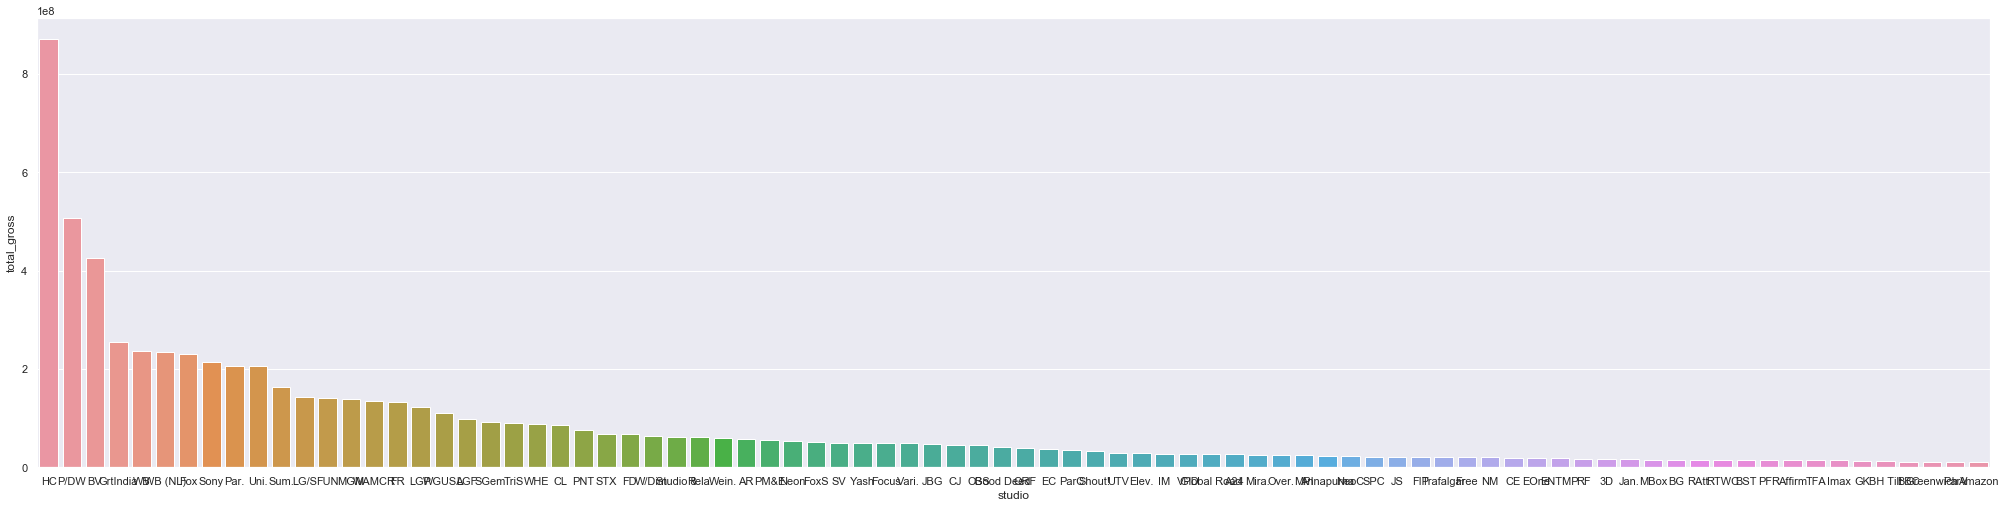

In [26]:
sns.set(rc={'figure.figsize':(35,8.27)})
sns.barplot(x="studio", y="total_gross", data=filtered_grouped_movie_gross_df)

## Data cleaning for movies_df

In [27]:
movies_df['tconst'].isna().sum()
movies_df['primaryTitle'].isna().sum()
movies_df['startYear'].isna().sum()
movies_df['genres'].isna().sum()

0

0

0

0

In [28]:
movies_df=movies_df.drop_duplicates(subset='tconst', keep='first')

## Data cleaning for movie_budgets_df

In [29]:
movie_budgets_df.isna().sum()
## There is no need to drop columns.

id                   0
release_date         0
movie                0
production_budget    0
domestic_gross       0
worldwide_gross      0
dtype: int64

In [31]:
## I did not drop the duplicates because there were different movies with the same name.

# movie_budgets_df = movie_budgets_df.drop_duplicates(subset="id", keep="first")

## Merging two dataframes

In [32]:
movies_df = movies_df.rename(columns={'primaryTitle': 'movie'})

In [33]:
movie_budgets_df = pd.merge(movie_budgets_df, movies_df, how='inner', on='movie')

In [34]:
movie_budgets_df['genres'] = movie_budgets_df['genres'].apply(lambda x: x.replace(',',''))

In [35]:
movie_budgets_df["genres"]= movie_budgets_df["genres"].str.split(",", 3) 

In [36]:
movie_budgets_df=movie_budgets_df.explode('genres')

In [37]:
##Resetting the index and dropping the previous index column
movie_budgets_df = movie_budgets_df.reset_index()
movie_budgets_df = movie_budgets_df.drop(columns = ['index'])

In [ ]:
# movie_budgets_df=movie_budgets_df[:200] ??????

In [39]:
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(lambda x: x.replace(',',''))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(lambda x: x.replace('.',''))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(lambda x: x.replace('$',''))


In [40]:
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(int)

In [42]:
movie_budgets_df = movie_budgets_df.sort_values(by='worldwide_gross', ascending = False)

## Plot the genres of movies

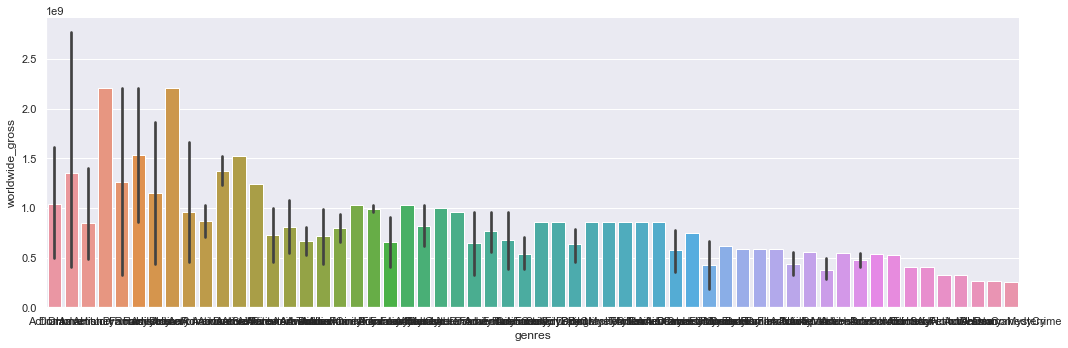

In [43]:
sns.catplot(x="genres", y="worldwide_gross", data=movie_budgets_df, kind="bar",height=5,aspect=3 )

## Plot the budget and gross

In [45]:
movie_budgets_df = pd.read_csv('zippedData/tn.movie_budgets.csv.gz')

In [46]:
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(lambda x: x.strip('$'))
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].apply(lambda x: x.replace(',',''))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(lambda x: x.strip('$'))
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].apply(lambda x: x.replace(',',''))

In [47]:
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(lambda x: x.strip('$'))
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].apply(lambda x: x.replace(',',''))

In [48]:
movie_budgets_df.head()

,id,release_date,movie,production_budget,domestic_gross,worldwide_gross
0,1,"Dec 18, 2009",Avatar,425000000,760507625,2776345279
1,2,"May 20, 2011",Pirates of the Caribbean: On Stranger Tides,410600000,241063875,1045663875
2,3,"Jun 7, 2019",Dark Phoenix,350000000,42762350,149762350
3,4,"May 1, 2015",Avengers: Age of Ultron,330600000,459005868,1403013963
4,5,"Dec 15, 2017",Star Wars Ep. VIII: The Last Jedi,317000000,620181382,1316721747


In [49]:
movie_budgets_df['production_budget'] = movie_budgets_df['production_budget'].astype(float)
movie_budgets_df['worldwide_gross'] = movie_budgets_df['worldwide_gross'].astype(float)

In [50]:
movie_budgets_df['domestic_gross'] = movie_budgets_df['domestic_gross'].astype(float)

In [51]:
type(movie_budgets_df['production_budget'][0])

numpy.float64

In [52]:
movie_budgets_df['release_month'] = [a[0:3] for a in movie_budgets_df['release_date']]

(-50000000.0, 894012871.8263204)

(-300000000.0, 2963374171.4062576)

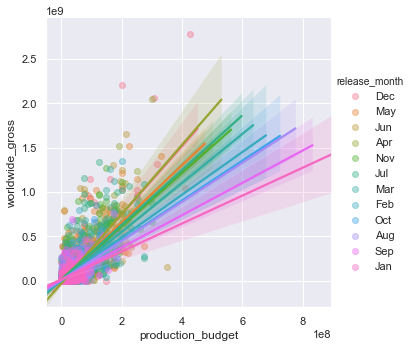

In [53]:
sns.lmplot(x="production_budget", y="worldwide_gross",hue= 'release_month', data=movie_budgets_df, scatter_kws={'alpha': 0.4},height=5,aspect=1)
plt.xlim([-0.5e8, None])
plt.ylim([-0.3e9, None])


(-50000000.0, 894012871.8263204)

(-300000000.0, 1026593838.7531556)

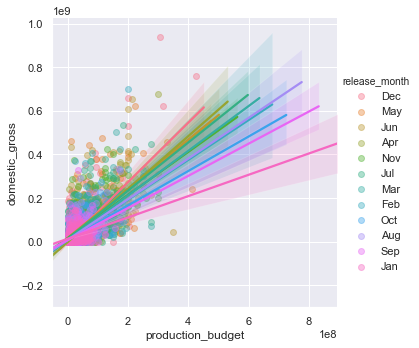

In [54]:
sns.lmplot(x="production_budget", y="domestic_gross", hue= 'release_month', data=movie_budgets_df, scatter_kws={'alpha': 0.4})
plt.xlim([-0.5e8, None])
plt.ylim([-0.3e9, None])

In [ ]:
sum_column = movie_gross_df['foreign_gross'] + movie_gross_df['domestic_gross']
movie_gross_df["total_gross"] = sum_column